In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "C:/Users/jsinswe/Downloads/"
file = "marketing_campaign.csv"
df = pd.read_csv(path+file, sep="\t", verbose=False)
#df.memory_usage(index=False, deep=False)
df = df.drop_duplicates(subset="ID")
df.sort_values(by=['ID']).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,...,1,0,0,0,0,0,0,3,11,0
822,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,0,3,11,1
1511,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,8,0,0,0,0,0,0,3,11,0
1654,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,6,0,0,0,0,0,0,3,11,0
1906,17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,...,5,0,0,0,0,0,0,3,11,0


In [2]:
df.groupby(['Education']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=False).reset_index(drop=True)

,Education,Counts
0,Graduation,1127
1,PhD,486
2,Master,370
3,2n Cycle,203
4,Basic,54


In [3]:
df.groupby(['Marital_Status']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=False).reset_index(drop=True)

,Marital_Status,Counts
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


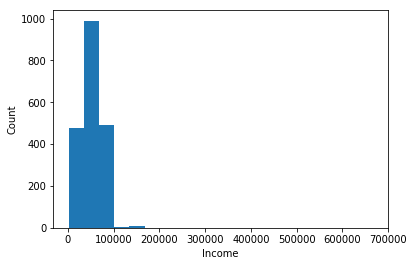

In [4]:
# Plot histogram
df = df.groupby(['Income']).size().reset_index(name='Counts')
x=np.array(df['Income'])
y=np.array(df['Counts'])
d=np.concatenate((x,y))
plt.hist(d, density=False, bins=20,range=(x.min(),x.max()))
plt.ylabel('Count')
plt.xlabel('Income');

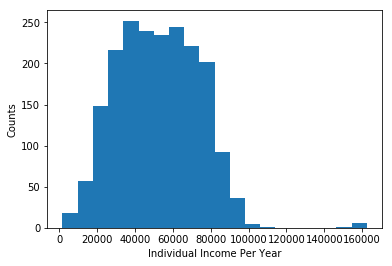

In [5]:
# Outlier detection criteria: values > outerfence
IQR = df['Income'].quantile(q=0.75) - df['Income'].quantile(q=0.25)
outerfence = df['Income'].quantile(q=0.75) + 3*IQR

# Plot histogram - Remove Outliers
df = df.groupby(['Income']).size().reset_index(name='Counts')
df = df[df['Income'] <= outerfence]
x=np.array(df['Income'])
y=np.array(df['Counts'])
d=np.concatenate((x,y))
plt.hist(d, density=False, bins=20,range=(x.min(),x.max()))
plt.ylabel('Counts')
plt.xlabel('Individual Income Per Year');